In [4]:
from faker import Faker
fake=Faker()

In [7]:
import pandas as pd, numpy as np, matplotlib as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import plotly.graph_objects as go

In [8]:
kms_per_radian = 6371.0088 
epsilon = 2.0 / kms_per_radian #max distance points can be apart to be considered a cluster/epsilon and coordinates are converted to radians because that's what scikit-learn's haversine method uses

In [9]:
fake_data = []
for i in range(1000):
    fake_data.append(fake.local_latlng())

In [10]:
df = pd.DataFrame(data = fake_data, columns = ['Lat','Lon','Local Name','Nation','Metro Area'])

In [11]:
df['Lon'] = pd.to_numeric(df['Lon'],downcast='float')

In [12]:
df.head(15)

,Lat,Lon,Local Name,Nation,Metro Area
0,41.14676,-73.494843,New Canaan,US,America/New_York
1,33.98154,-81.236214,Lexington,US,America/New_York
2,41.14676,-73.494843,New Canaan,US,America/New_York
3,29.53885,-95.447441,Fresno,US,America/Chicago
4,41.54566,-71.291443,Middletown,US,America/New_York
5,41.55838,-81.569290,Collinwood,US,America/New_York
6,42.16808,-88.428139,Huntley,US,America/Chicago
7,42.30865,-83.482162,Canton,US,America/Detroit
8,39.09112,-94.415512,Independence,US,America/Chicago
9,42.58342,-71.802299,Fitchburg,US,America/New_York


In [ ]:
coords = df[['Lat','Lon']].to_numpy()

In [ ]:
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))

In [ ]:
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

In [ ]:
clusters

In [ ]:
fig = go.Figure()

#Scattergeo(
#locationmode = 'USA-states',
#lon=df['Lon'],
#lat=df['Lat'],
#mode='markers',
#marker = dict(
#            size = 8,
#            opacity = 0.8,
#            reversescale = True,
#            autocolorscale = False,
#            symbol = 'square',
#            line = dict(
#                width=1,
#                color='rgba(102, 102, 102)'
#            ),
#colorscale='Blues',
#)))
fig.show()

In [ ]:
#this example includes the hull convex to calculate the area covered by the polygon

from scipy.spatial import ConvexHull
import folium

m = folium.Map(location=[43.6, 1.43], zoom_start=13)

pts = [
[43.601795137863135, 1.451673278566412],
[43.61095574264419, 1.437239509310642],
[43.60999839038903, 1.45630473303456],
[43.60607351937904, 1.438762676051137],
[43.59725521090158, 1.444569790831369],
[43.6076281683173, 1.451991362348086]
]

b = [pts[i] for i in ConvexHull(pts).vertices]

folium.features.PolygonMarker(locations=b, color='#FF0000', fill_color='blue', weight=5).add_to(m)

In [20]:
#compute the eps for dbscan using NearestNeighbours

from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(df[['Lat','Lon']])
distances,indices = neighbors.kneighbors(df[['Lat','Lon']])

distances = np.sort(distances[:,4],axis=0) #this value generally seems to be one less that n_neighbors



0.0


<Figure size 1080x1080 with 0 Axes>

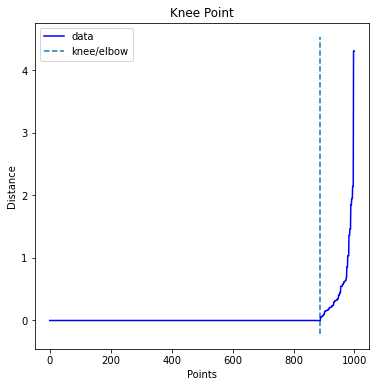

In [22]:
from kneed import KneeLocator
import matplotlib.pyplot as plt

i = np.arange(len(distances))
knee = KneeLocator(i,distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig=plt.figure(figsize=(15,15))

knee.plot_knee()
plt.xlabel('Points')
plt.ylabel('Distance')

print(distances[knee.knee])